In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import zoom

Изучение производительности будет производиться на числе вершин $1000$, $5000$, $10^4$, $10^5$, $10^6$.

Измерения будут проводиться в два этапа: на случайных графах и на реальных графах дорог Соединенных Штатов Америки.

Случайные графы генерировались следующим образом: создавался пустой граф размера $N$, затем он делался связным деревом. Потом добавлялись ребра между двумя произвольными вершинами. Вес ребер - $10^9$. Затем из вершины $0$ запускался каждый алгоритм. Случайных граф для каждого $N$ и $M$ создавался $20$ раз.

Алгоритмы, которые сравнивались:

* ford_bellman - Стандартный Форд-Беллман. $O(NM)$
* SPFA - Shortest Path Faster Algorithm. $O(NM)$, но быстрее.
* dijkstra_bin_heap - Дейкстра на двоичной куче. $O(M+Nlog(N/M)logN)$
* dijkstra_fib_heap - Дейкстра на фибоначчиевой куче. $O(M+NlogN)$
* dijkstra_rb_tree - Дейкстра на красно черном дереве. $O((N+M)logN)$
* dijkstra_avl_tree - Дейкстра на $AVL$-дереве. $O((N+M)logN)$
* thorup - Алгоритм Торупа за $O(N+M(\alpha(N)+logC))$. Т.к в практических задачах $logC>\alpha(N)$, то $O(N+MlogC)$. Важно заметить, что время работы замерялась **только** для запроса кратчайшего пути. Реально алгоритму Торупа за время примерно равное времени самого запроса построить необходимые структуры данных, а затем только отвечать на сами запросы.

In [2]:
def paint_graph(name, values):
    values = list(values.items())
    plt.figure(figsize=[18,9])
    plt.grid(True)
    plt.title('Зависимость времени выполнения от числа ребер при N = {}'.format(name))
    plt.xlabel('Число ребер')
    plt.ylabel('Время выполнения')
    plt.gca().set_position([0, 0, 1, 1])
    for i in range(len(values)):
        x = [values[i][1][j][1] for j in range(len(values[i][1]))]
        y = [values[i][1][j][2]*m for j in range(len(values[i][1]))]
        plt.plot(
            zoom(x, 2),
            zoom(y, 2)
        )
    plt.legend([values[i][0] for i in range(len(values))])

In [3]:
def parser(file):
    data = []
    with open(file, 'r') as f:
        data = f.read().split()
    names, ptr = {}, 0
    while ptr < len(data):
        names[data[ptr]] = []
        for i in range(int(data[ptr+1])):
            names[data[ptr]].append((
                int(data[ptr+2+3*i]),
                int(data[ptr+3+3*i]),
                float(data[ptr+4+3*i])
            ))
        ptr += 3*int(data[ptr+1])+2
    return names

Случайные графы с $N=1000$ и с числом ребер от $1000$ до $50000$.

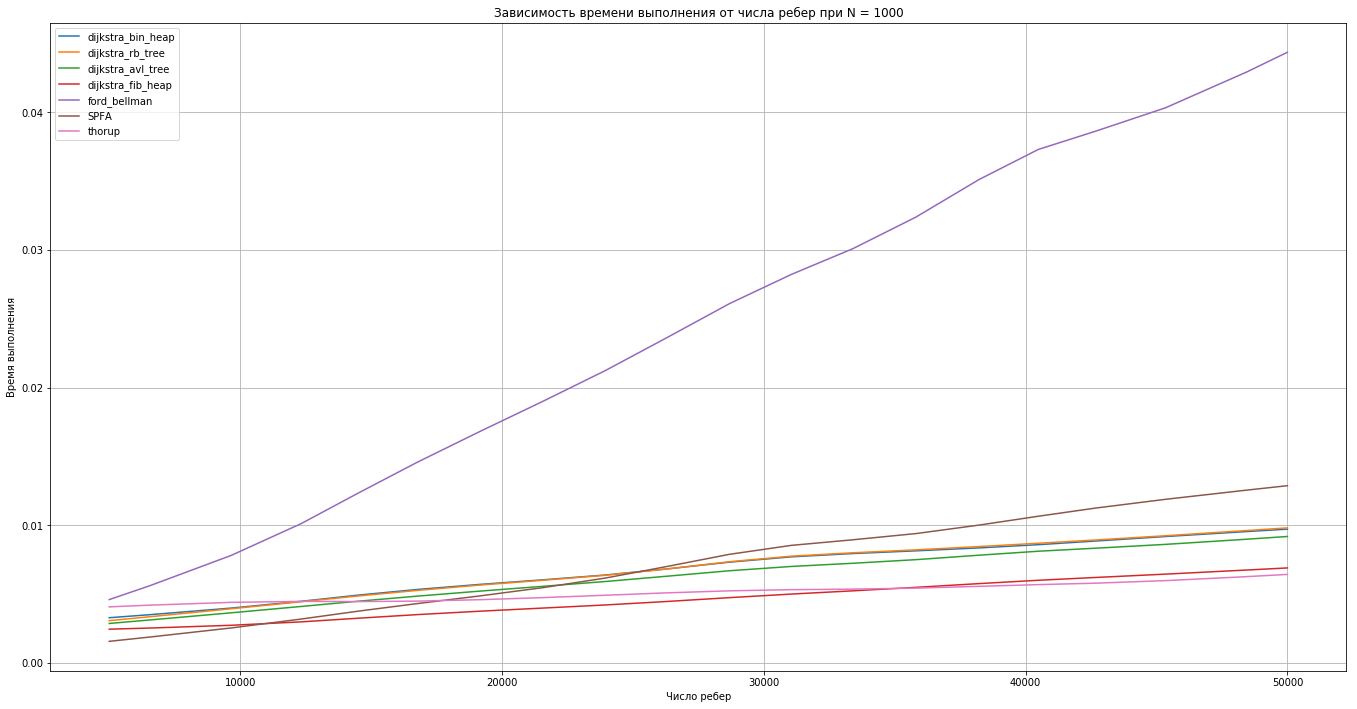

In [4]:
paint_graph('1000', parser('output1000ford.txt'))

Алгоритм Форда-Беллмана (предсказуемо) работает очень плохо. Для большей наглядности уберем его из графика, а также далее не будем его запускать (очень много времени на него уходит).

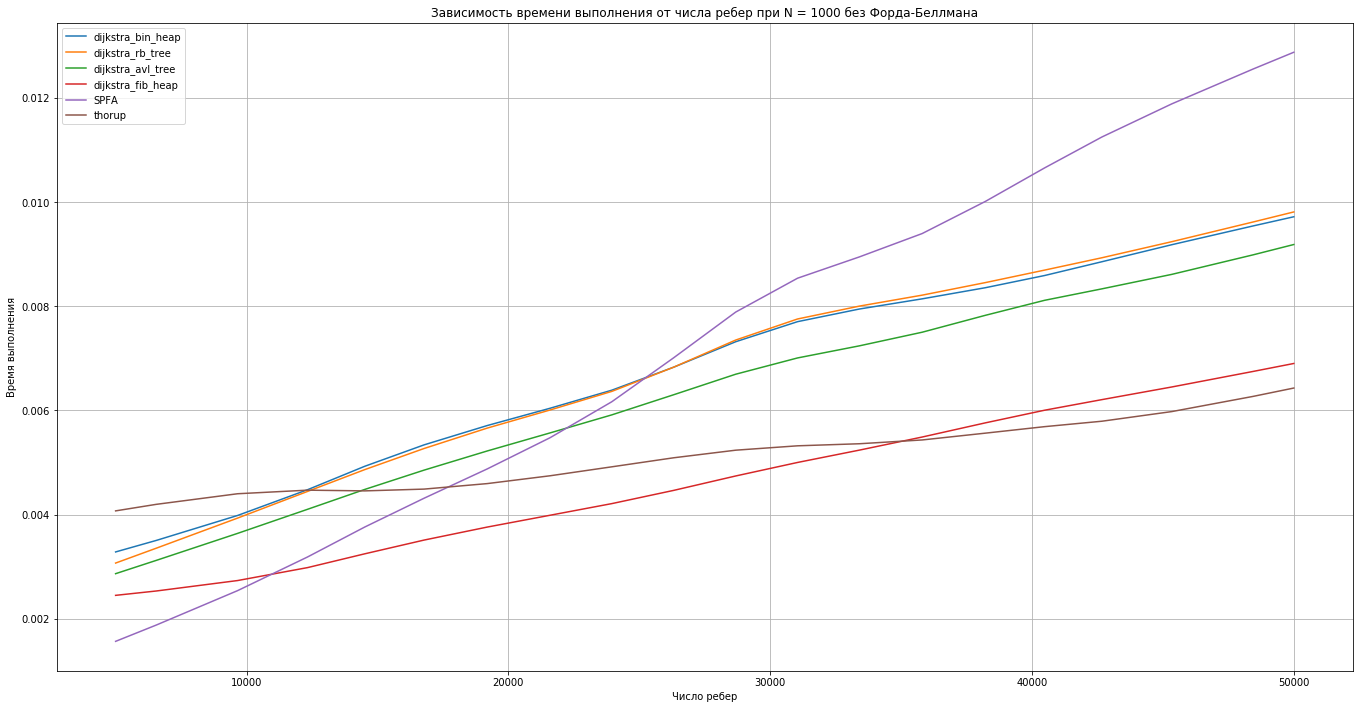

In [5]:
paint_graph('1000 без Форда-Беллмана', parser('output1000.txt'))

Очень интересно ведет себя алгоритм Торупа. Замечательно, что было не сразу видно, показывает себя алгоритм Дейкстры на фибоначчиевой куче. $AVL$-дерево дало хорошие результаты, остальные алгоритмы работают почти аналогично.

Что будет на графах с $N=5000$ и числом ребер от $5000$ до $2*10^6$?

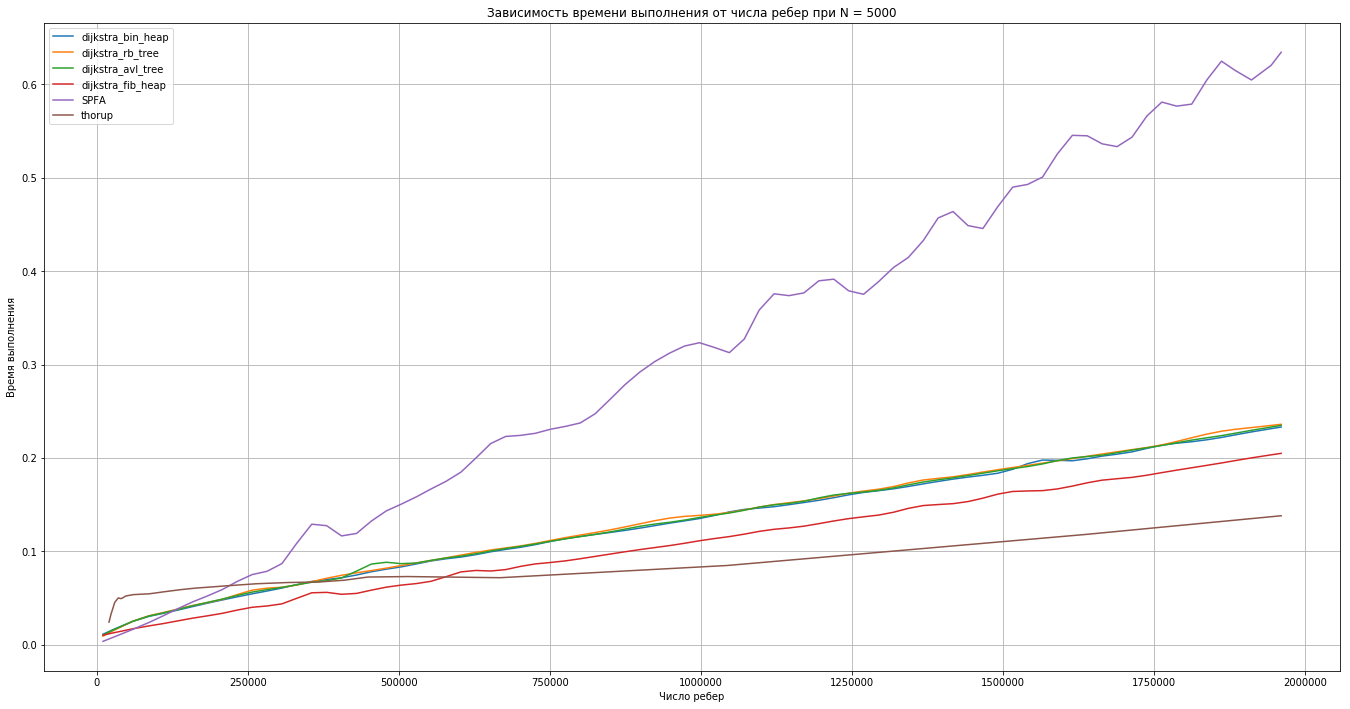

In [6]:
paint_graph('5000', parser('output5000spfa.txt'))

Вновь обратим внимание на один из алгоритмов: $SPFA$. Он работает очень нестабильно и зависит от входных данных. Уберем его.

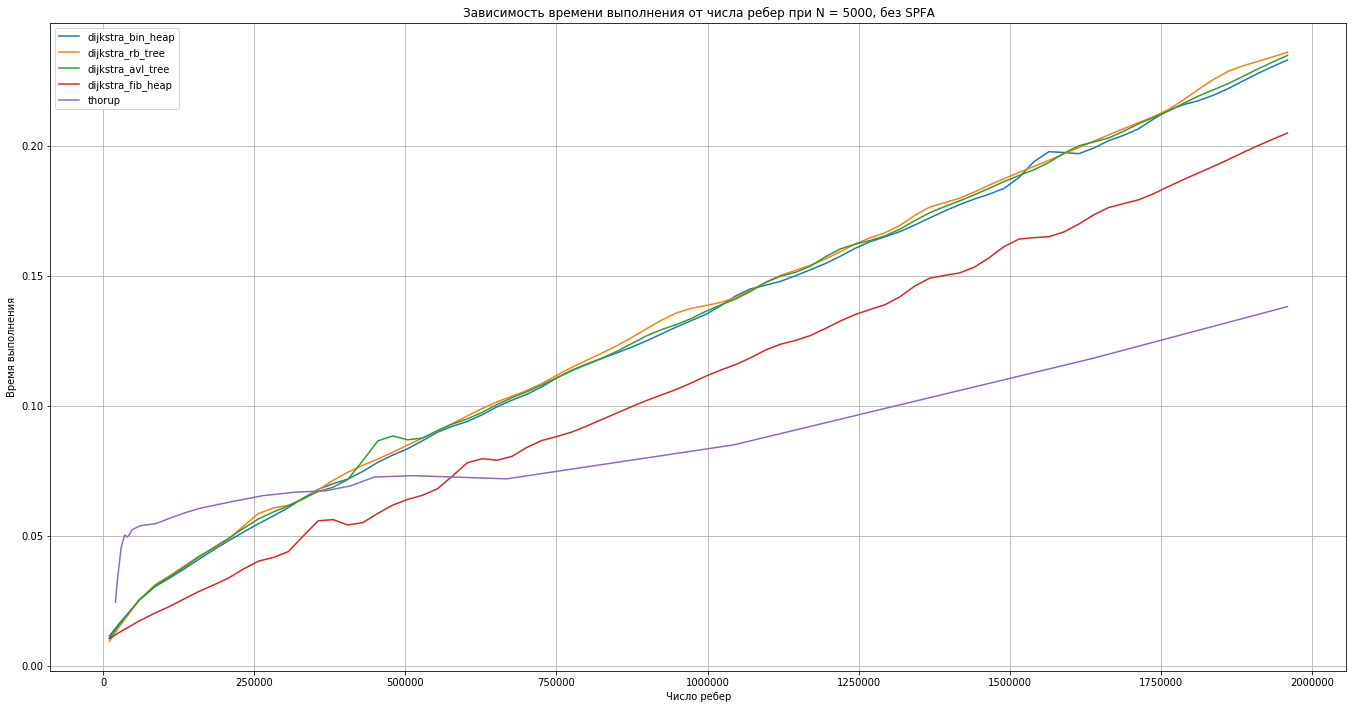

In [7]:
paint_graph('5000, без SPFA', parser('output5000.txt'))

Обратите внимание на характерный подъем в самом начале графика у Торупа. Затем он начинает замедляться медленнее остальных. Фибоначчиева куча вновь дала хорошие результаты. Остальные алгоритмы сравнялись.

Случайные графы с $N=10000$ и числом ребер от $10^5$ до $10^7$.

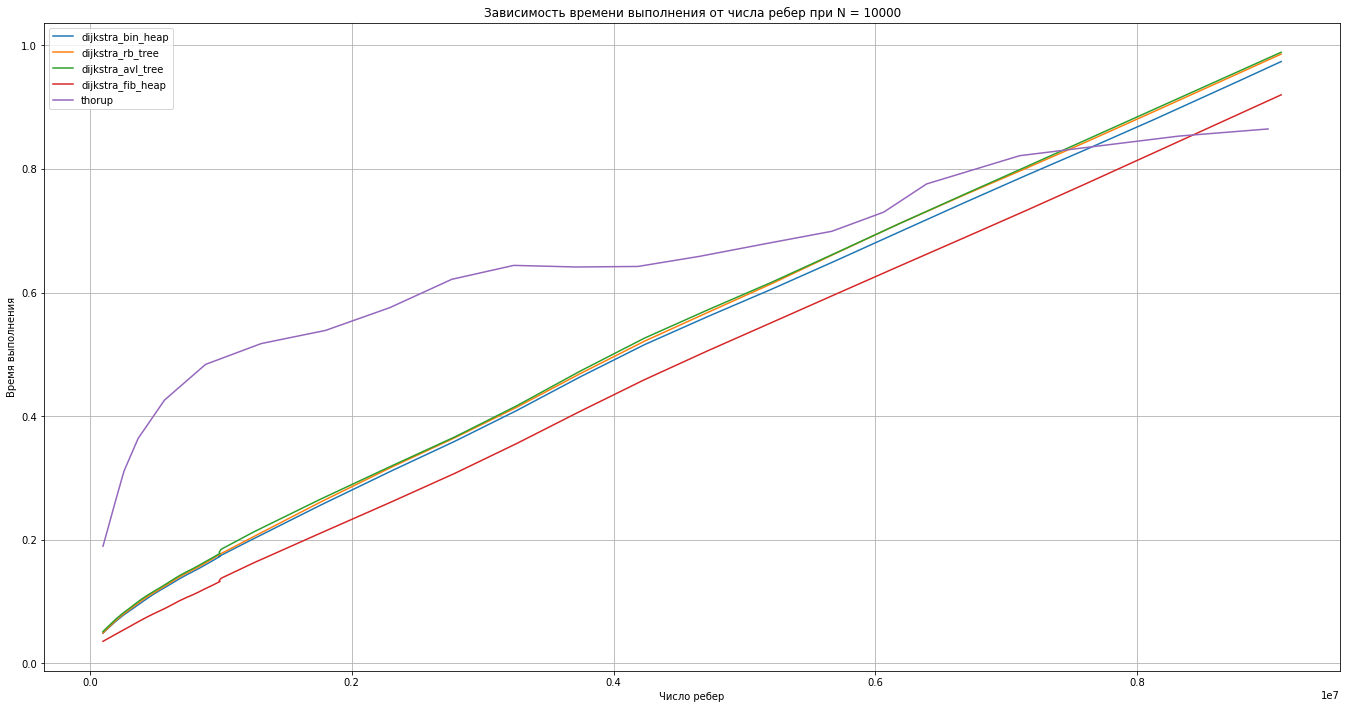

In [8]:
paint_graph('10000', parser('output10000.txt'))

Алгоритм Торупа вновь показывает характерный подъем в начале. Фибоначчиева куча работает быстрее всего, остальные алгоритмы - примерно равное время.

Случайные графы с $N=100000$ и числом ребер от $10^6$ до $10^8$.

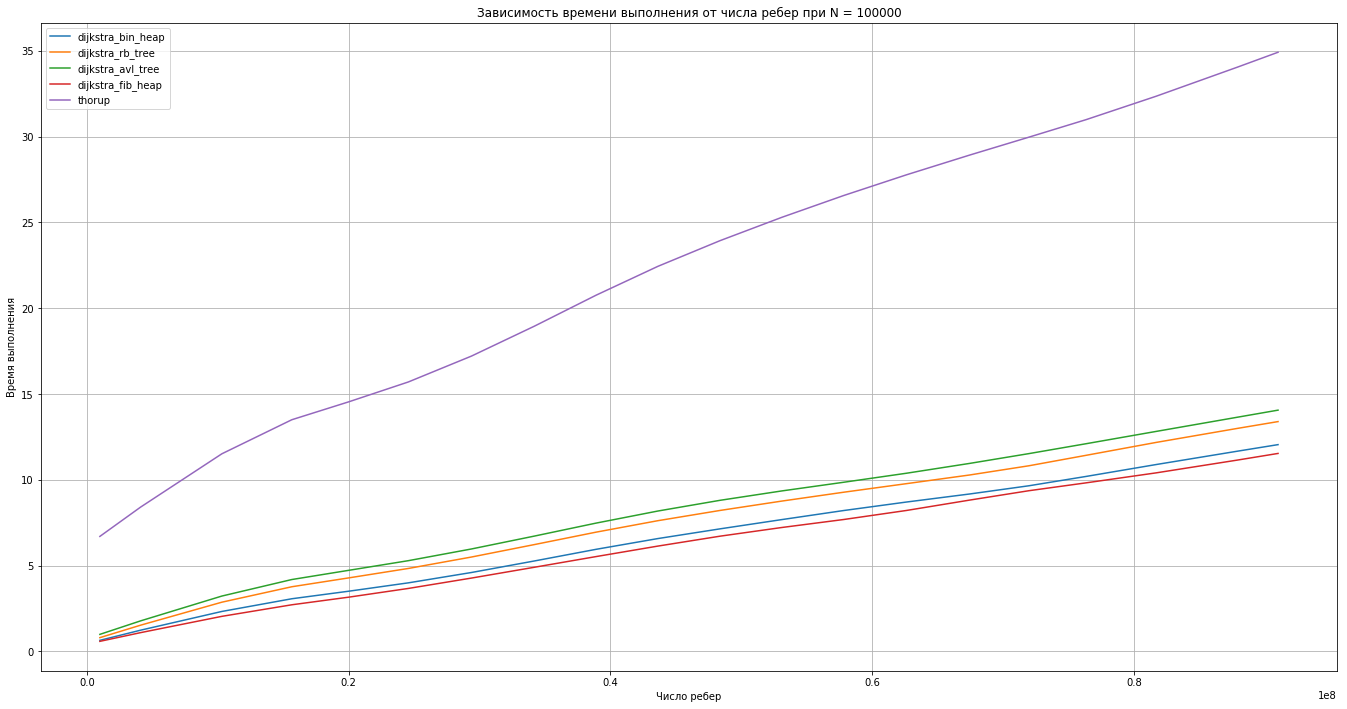

In [9]:
paint_graph('100000', parser('output100000all.txt'))

Алгоритм Торупа работает очень медленно. Кажется, что раз максимальное число ребер - $10^{10}$, то можно сказать, что тут тоже должен быть подъем, но проверить это в разумные сроки не удалось. Уберем его.

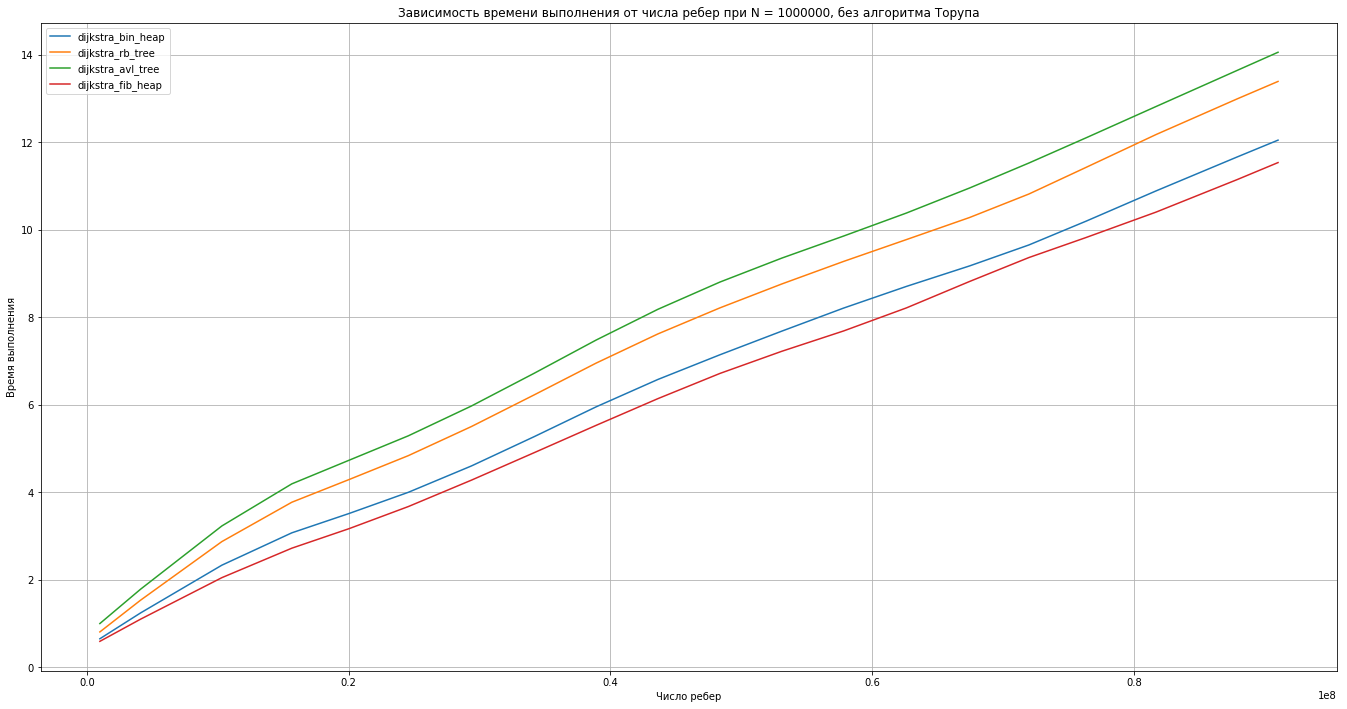

In [10]:
paint_graph('1000000, без алгоритма Торупа', parser('output100000.txt'))

Кажется, начиная с этого момента можно сказать, какова скорость работы алгоритмов на случайных графах. Оставим только два быстрейших: Дейкстра на фибоначчиевой куче и на двоичной куче.

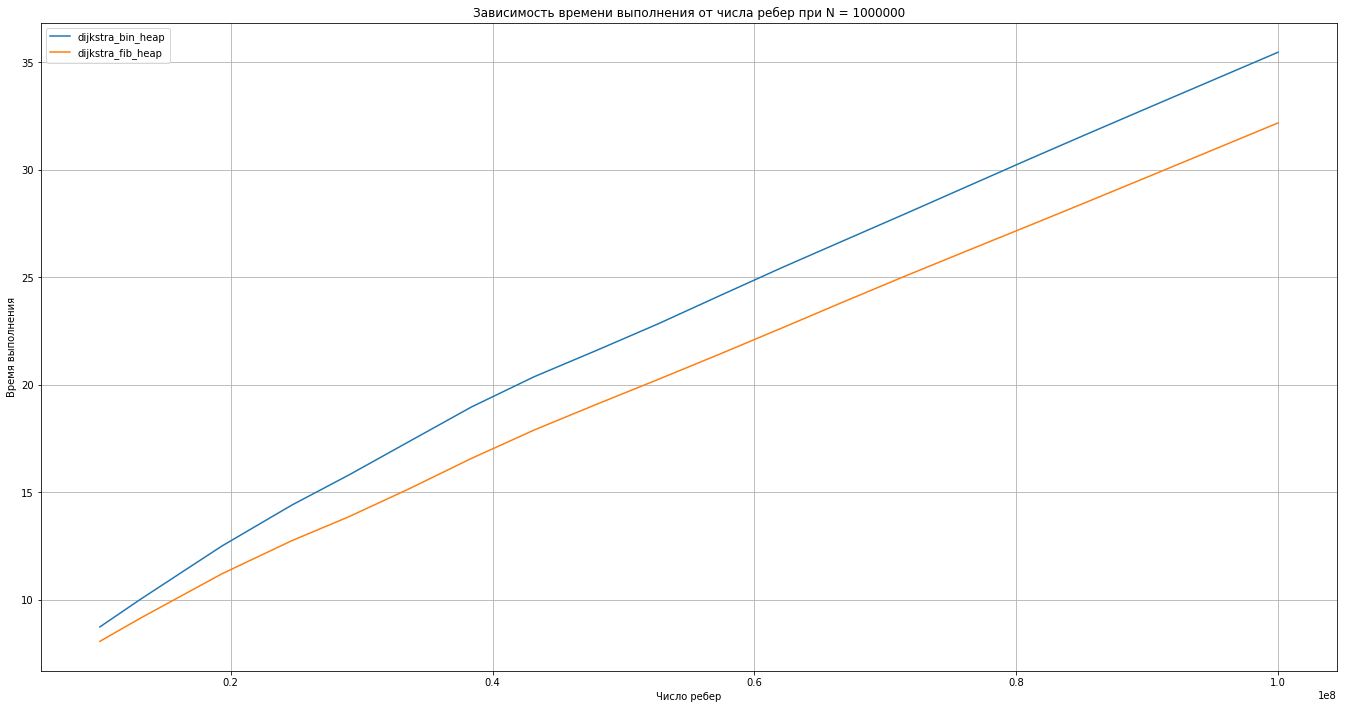

In [11]:
paint_graph('1000000', parser('output1000000.txt'))

Делаем вывод, что с ростом плотности графа фибоначчиева куча становится все быстрее и быстрее двоичной кучи на случайных графах.

Теперь следующий этап: результаты на реальных графах, взятых с $DIMACS$. Запускались алгоритмы из $100$ различных вершин. Результаты отсортированы по скорости.

In [12]:
import pandas as pd

def parse_DIMACS(name):
    with open(name, 'r') as f:
        data = f.read().split('\n')
    return pd.DataFrame([data[i].split() for i in range(1, len(data))], columns=data[0].split())


Граф дорог штата Колорадо. $N=435666$, $M=1057066$.

In [13]:
parse_DIMACS('colorado.txt')

,Имя,Время
0,dijkstra_rb_tree,0.54347
1,dijkstra_avl_tree,0.608276
2,dijkstra_bin_heap,0.650812
3,dijkstra_fib_heap,0.753871
4,SPFA,44.2924


$SPFA$ показал себя плохо. Форд-Беллман не сумел сработать в адекватный срок, поэтому он не участвовал.

Фибоначчиева куча работает дольше остальных, а красно-черное побеждает с отрывом.

Граф дорог штатов Калифорния и Невада. $N=1890815$, $M=5657742$.

In [14]:
parse_DIMACS('CaliforniaAndNevada.txt')

,Имя,Время
0,dijkstra_rb_tree,2.47119
1,dijkstra_avl_tree,2.83666
2,dijkstra_bin_heap,2.90706
3,dijkstra_fib_heap,3.54052


Все алгоритмы неплохи, но фибоначчиева куча не смогла отработать за приемлемое время, а красно-черное дерево отлично справилось с задачей.

Граф дорог Соединенных штатов. $N=23947346$, $M=58333344$.

In [15]:
parse_DIMACS('AllUSA.txt')

,Имя,Время
0,dijkstra_rb_tree,34.591
1,dijkstra_bin_heap,40.5688
2,dijkstra_avl_tree,41.6753
3,dijkstra_fib_heap,51.0743


Неожиданно $AVL$-дерево начало проигрывать двоичной куче. Фибоначчиева куча намекает, что она хочет отдохнуть...

#### ВЫВОДЫ

* Алгоритм Торупа, вероятно, хорош, если вы делаете много запросов к одному и тому же графу. Однако: нужно ли вам это?
* $SPFA$ не уступает остальным алгоритмам, если $2N>M$.
* Красно-черное дерево лучше использовать, чем $AVL$, потому что не столько нужна идеальная балансировка, сколько быстрая вставка.
* Фибоначчиева куча невероятно хороша на плотных графах. При примерно $5N<M$ она - лучший выбор.
* Форд-Беллман выиграет разве что в микроскопических графах за счет малой константы, но там и любой алгоритм работает неплохо.
* Если вы абсолютно не знаете характер вашего графа, то двоичная куча - лучший выбор.